# Understanding the  %%timeit magic command

This notebook explains how what the arguments `-r` and `-n` do 
in the magic command %%timeit.

In [1]:
%pylab inline
%matplotlib notebook
import math

M = 750000    # Increase to 75000000
v1 = rand(M)
v2 = rand(M)

def compute_angle(v1,v2):
    th = math.acos(sum(v1*v2)/(norm(v1,2)*norm(v2,2)))
    return th

print("")
print("{:>20s} {:.2f}".format('Memory (MB)',8.0*M/(1024**2)))

th = compute_angle(v1,v2)
print("{:>20s} {:.4f}".format('Angle (radians)',th))

Populating the interactive namespace from numpy and matplotlib

         Memory (MB) 5.72
     Angle (radians) 0.7234


We time the operation defined above to get a series of timing results we can later use to simulate the behavior of `%%timeit`.  To get this simulated data, we set `n=1` so that each call to the operation is timed.  Setting `n>1` returns an average of `n` calls.  The `r` parameter indicates how many n-loop averages to compute.  

In [2]:
n = 1        # Number of loops
r = 512     # Number of repetitions of each loop
p = 6        # Display precision

tbest = %timeit -n $n -r $r -p $p -o pass; th = compute_angle(v1,v2)

2.06772 ms ± 185.329 µs per loop (mean ± std. dev. of 512 runs, 1 loop each)


In [3]:
# Print some statistics

m = n*r
a = tbest.average*1000
b = tbest.best*1000
s = tbest.stdev*1000
t = array(tbest.all_runs)*1000.0/n

print("{:>20s} {:.4f}".format("Average time (ms)",a))
print("{:>20s} {:.4f}".format("Best time (ms)",b))
print("{:>20s} {:.4f}".format("Std (ms)",s))

   Average time (ms) 2.0677
      Best time (ms) 1.9150
            Std (ms) 0.1853


The following code simulates what different settings for `n` and `r` would return, given variable of the timing data.   The `%%timeit` loop is equivalent to the following (although actual timing results may be very different) : 

    import time
    # the %%timeit loop, using (n,r) arguments
    T = empty(r)
    for i in range(r):
        t0 = time.time()     # import time
        for j in range(n):
            w = compute_angle(v1,v2)
        T[i] = (time.time() - t0)/n
    t = mean(T)
    
    print('Result : {:.4f}'.format(t)*1000)

<IPython.core.display.Javascript object>


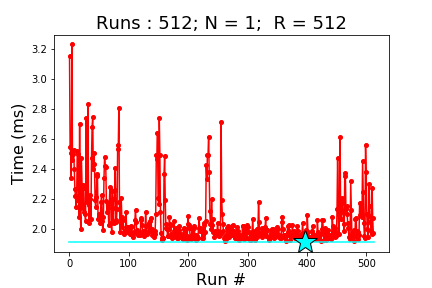

In [4]:
from ipywidgets import interactive, fixed

def compute_window(t,N):
    m = len(t)
    ymin = 2*max(t)
    xmin = None
    R = int(m/N)
    xavg = empty(R)
    yavg = empty(R)
    for i in range(R):
        i1 = i*N
        i2 = (i+1)*N
        x = [i1,i2]
        d = t[i1:i2]
        xavg[i] = (i1+i2)/2
        yavg[i] = mean(d)
 
    return xavg,yavg

def cb_window(f,t,tstr,w,bline,b,p):
    
    N = 2**p
    m = len(t)
    xavg,yavg = compute_window(t,N)
    w.set_xdata(xavg)
    w.set_ydata(yavg)
    
    imin = argmin(yavg)
    b.set_xdata(xavg[imin])
    b.set_ydata(yavg[imin])
    bline.set_ydata([yavg[imin]]*2)

    title(tstr.format(m,N,int(m/N)),fontsize=18)
    f.canvas.draw()
          
    imax = argmax(yavg)
    print("{:>10} {}".format('N (2^p)',N))
    print("{:>10} {}".format('Worst (ms)',yavg[imax]))
    print("{:>10} {}".format('Best (ms)',yavg[imin]))
    print("{:>10} {}".format('Diff.',yavg[imax]-yavg[imin]))
    return None

def plot_window(t,m,N):
    fig = figure()
    clf()

    # Plot data
    plot(range(m),t,'.',markersize=2,color='gray')

    xavg,yavg = compute_window(t,N)
    wnd, = plot(xavg,yavg,'.-',color='red',markersize=8)
    imin = argmin(yavg)
    bline, = plot([0,m],[yavg[imin]]*2,'-',color='cyan')
    b, = plot(xavg[imin],yavg[imin],'*',color='cyan',markersize=25,mec='k')
          
    xlabel("Run #",fontsize=16)
    ylabel("Time (ms)",fontsize=16)
    tstr = "Runs : {}; N = {};  R = {}"
    title(tstr.format(m,N,int(m/N)),fontsize=18)
        
    # needed to create slider
    pmax = int(log2(m))
    w = interactive(cb_window, f=fixed(fig),t=fixed(t),
        tstr=fixed(tstr),w=fixed(wnd),bline=fixed(bline),b=fixed(b),p=(0,pmax,1));
    w.background_color='white'
    return w

w = plot_window(t,m,16)

In [5]:
display(w)

A Jupyter Widget